<a href="https://colab.research.google.com/github/imyoungchae/Tensorflow_study/blob/main/tensorflow4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS 꽃분류
- Fully Connected Layer(Dense)를 활용한 분류 모델(Clasification)
- tensorflow-datasets를 활용한 데이터 전처리

In [1]:
from IPython.display import Image

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

train_dataset와 valid_dataset을 만들고 80:20으로 분할

In [3]:
train_dataset = tfds.load('iris', split='train[:80%]')
valid_dataset = tfds.load('iris', split='train[80%:]') #=split='train[-20%]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/iris/2.0.0.incompleteTUPS46/iris-train.tfrecord


  0%|          | 0/150 [00:00<?, ? examples/s]

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


전처리 요구조건
- label 값을 one-hot encoding 할 것
- feature(x),label(y)를 분할할 것

In [10]:
for data in train_dataset.take(5):
    x = data['features']
    y = data['label']
    y = tf.one_hot(y,3) # class가 3개
  

전처리 함수

In [11]:
def preprocess(data):
    x = data['features']
    y = data['label']
    y = tf.one_hot(y,3) 
    return x,y

batch size/batch 개념

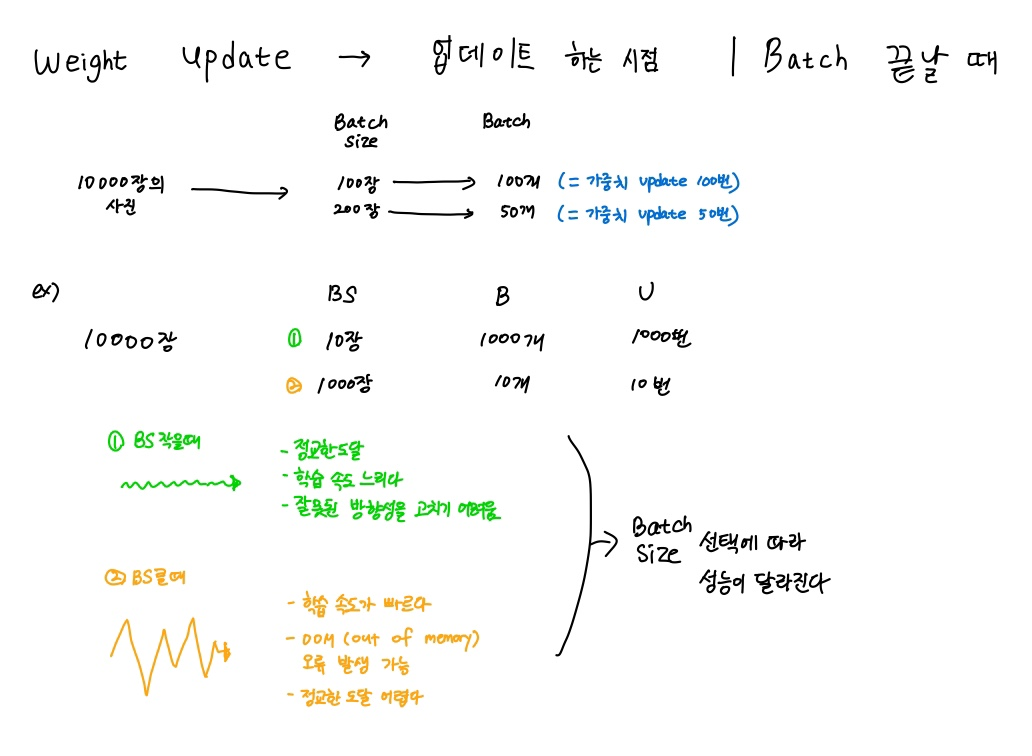

In [12]:
batch_size=10

In [13]:
train_data = train_dataset.map(preprocess).batch(batch_size) 
# map안에 전처리 함수 이름 넣기
# 받아온 변수 train_data와 뒷 변수 이름 달라야 한다
# 뒤에 .batch(batch_size) 해주기

In [14]:
valid_data = valid_dataset.map(preprocess).batch(batch_size)

모델 정의 (Sequential)
- input_shape는 꽃 데이터셋의 x의 feature 갯수가 4개 이므로 (4,)로 지정
- Dense Layer에 activation='relu' 적용
- 분류의 마지막 층의 출력 숫자는 분류하고자 하는 클래스 갯수와 같아야 함

In [17]:
model = tf.keras.models.Sequential([
    # input_shape는 X의 feature 갯수가 4개 이므로 (4, )로 지정합니다.
    Dense(512, activation='relu', input_shape=(4,)), # 튜플이기때문에 (4)가 아니고 (4,)
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Classification을 위한 Softmax, 클래스 갯수 = 3개
    Dense(3, activation='softmax'),
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               2560      
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-tr

Compile


1. optimizer는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용
2. loss설정
  * 출력층 activation이 sigmoid 인 경우:
  binary_crossentropy
  * 출력층 activation이 softmax 인 경우: 
    * 원핫인코딩(O): categorical_crossentropy
    * 원핫인코딩(X): sparse_categorical_crossentropy)
3. metrics를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있음

전처리 단계에서 One-hot encoding 해주었으므로 cateforical_crossentropy

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

ModelCheckpoint 생성

val_loss 기준으로 epoch 마다 최적의 모델을 저장하기 위하여, ModelCheckpoint를 만든다
* checkpoint_path는 모델이 저장될 파일 명을 설정
* ModelCheckpoint을 선언하고, 적절한 옵션 값을 지정

In [20]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

학습(Fit)
- validation_data 반드시 지정
- epochs 적절하게 지정
- callbacks에 바로 위에서 만든 checkpoint 지정

In [21]:
history = model.fit(train_data,
                    validation_data=(valid_data),
                    epochs=20,
                    callbacks=[checkpoint],
                   )

Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 0.8177 - acc: 0.7000
Epoch 1: val_loss improved from inf to 0.56276, saving model to my_checkpoint.ckpt
12/12 [==============================] - 1s 30ms/step - loss: 0.8177 - acc: 0.7000 - val_loss: 0.5628 - val_acc: 0.7333
Epoch 2/20
11/12 [==========================>...] - ETA: 0s - loss: 0.4009 - acc: 0.8909
Epoch 2: val_loss improved from 0.56276 to 0.30735, saving model to my_checkpoint.ckpt
12/12 [==============================] - 0s 15ms/step - loss: 0.3893 - acc: 0.8917 - val_loss: 0.3073 - val_acc: 0.9000
Epoch 3/20
11/12 [==========================>...] - ETA: 0s - loss: 0.2325 - acc: 0.9182
Epoch 3: val_loss improved from 0.30735 to 0.27012, saving model to my_checkpoint.ckpt
12/12 [==============================] - 0s 15ms/step - loss: 0.2287 - acc: 0.9167 - val_loss: 0.2701 - val_acc: 0.8667
Epoch 4/20
11/12 [==========================>...] - ETA: 0s - loss: 0.1339 - acc: 0.9818
Epoch 4: val_loss improved 

Load Weigths(ModelCheckpoint)

In [23]:
# checkpoint 를 저장한 파일명을 입력
model.load_weights(checkpoint_path)

Loss에 대한 시각화

In [25]:
import matplotlib.pyplot as plt

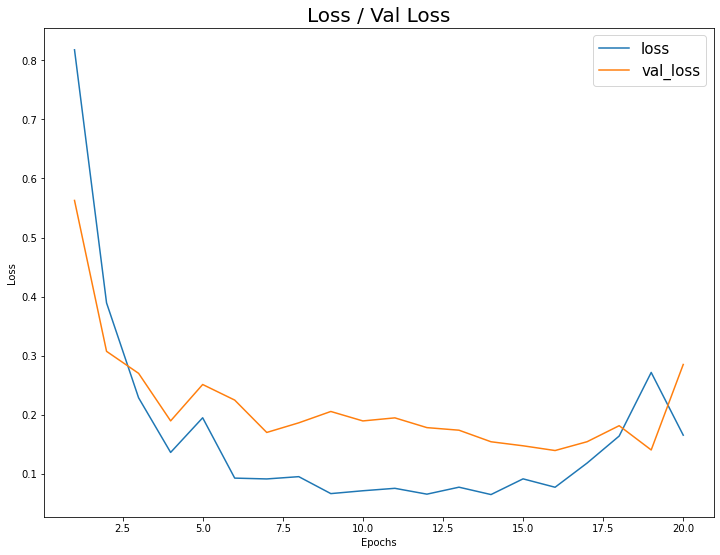

In [26]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

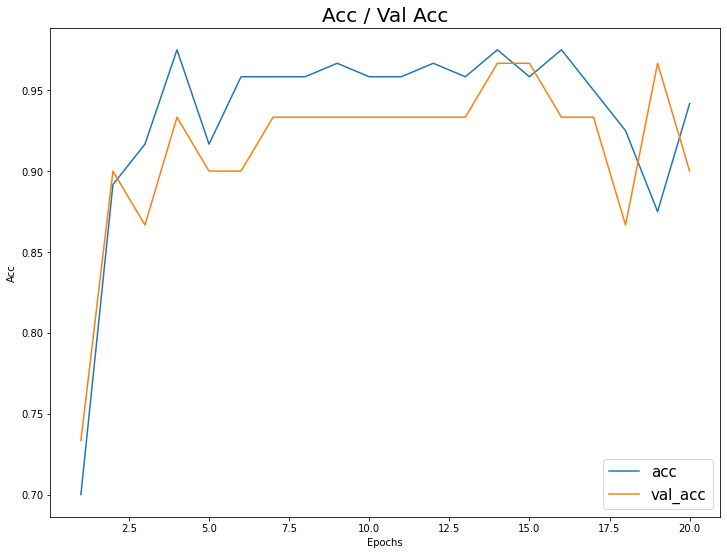

In [27]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()